In [4]:
!pip3 install pandas matplotlib numpy scikit-learn

In [5]:
import pandas as pd

In [6]:
import matplotlib.pyplot as plt

In [7]:
import numpy as np

In [8]:
housing = pd.read_csv("housing.csv")


In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

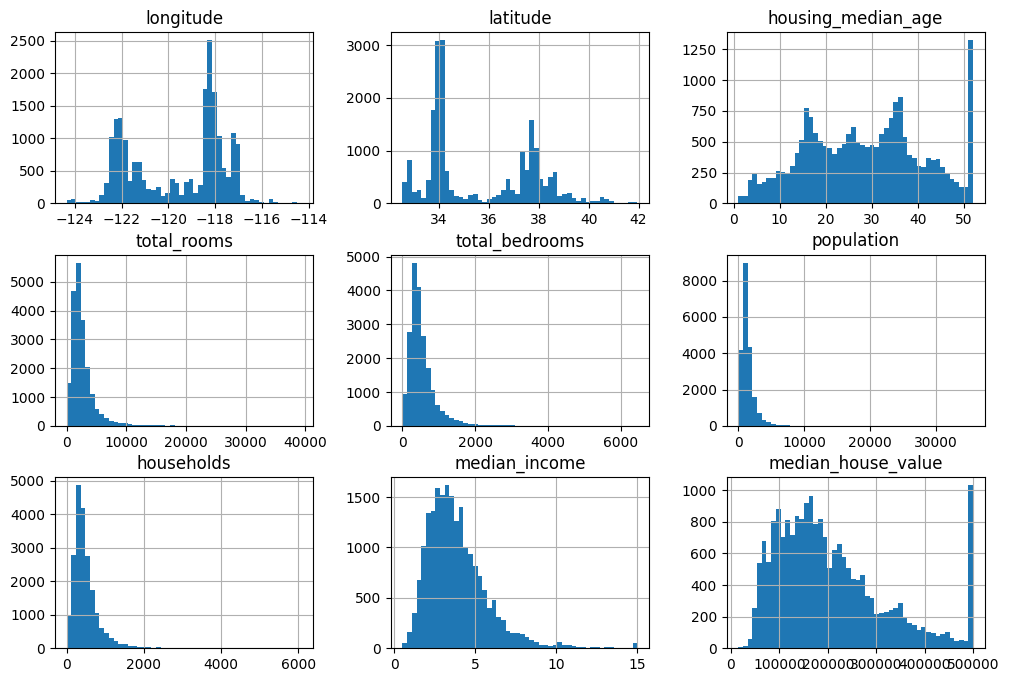

In [11]:
housing.hist(bins=50, figsize=(12,8))

In [12]:
plt.show()


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

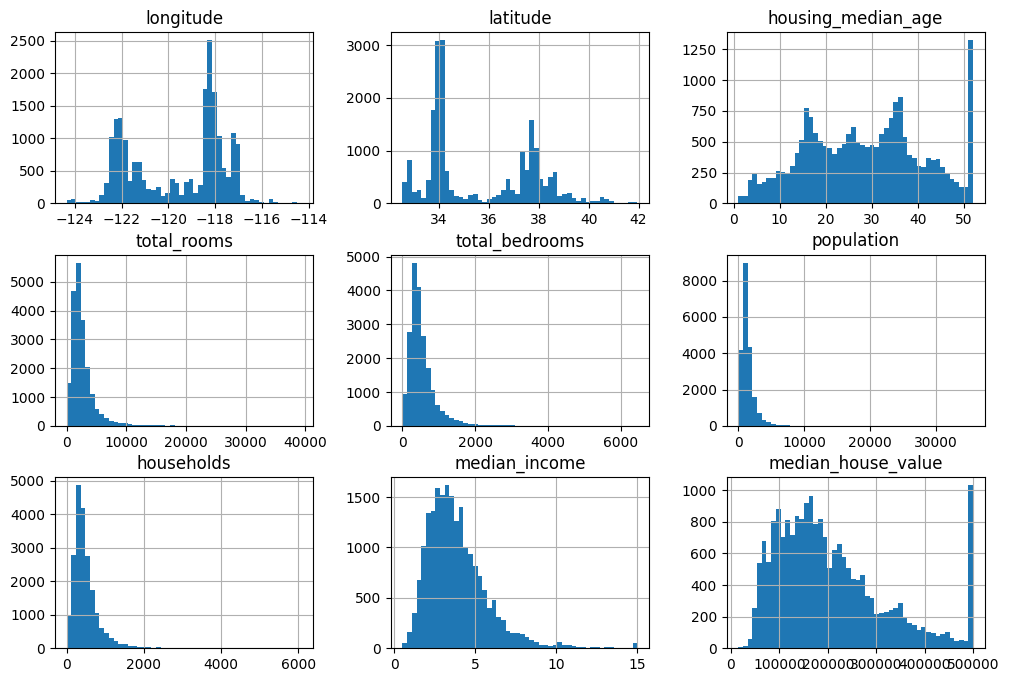

In [14]:
housing.hist(bins=50, figsize=(12,8))

In [16]:
np.random.permutation(len(housing))

array([ 2573,  5154, 16852, ..., 10019,    37,  8951])

In [17]:
from zlib import crc32
crc32(np.int64(1232112))

3756694860

In [18]:
housing.reset_index()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [19]:
def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

In [20]:
def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_ : is_id_in_test_set(id_, test_ratio))
    return data.loc[-in_test_set], data.loc[in_test_set]

In [21]:
housing_with_id = housing.reset_index()

In [23]:
tr , ts = split_data_with_id_hash(housing_with_id, 0.2, "index")


In [24]:
housing_with_id

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [25]:
tr

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
6,6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [26]:
ts

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
5,5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY
16,16,-122.27,37.85,52.0,1966.0,347.0,793.0,331.0,2.7750,152500.0,NEAR BAY
23,23,-122.27,37.84,52.0,1688.0,337.0,853.0,325.0,2.1806,99700.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
20615,20615,-121.54,39.08,23.0,1076.0,216.0,724.0,197.0,2.3598,57500.0,INLAND
20617,20617,-121.53,39.06,20.0,561.0,109.0,308.0,114.0,3.3021,70800.0,INLAND
20622,20622,-121.44,39.00,20.0,755.0,147.0,457.0,157.0,2.4167,67000.0,INLAND
20626,20626,-121.43,39.18,36.0,1124.0,184.0,504.0,171.0,2.1667,93800.0,INLAND


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [29]:
mxicut = pd.cut(housing["median_income"], bins=[0,1.5,3,4.5,6,np.inf], labels=[1,2,3,4,5])

In [31]:
housing["income_cat"] = mxicut

In [32]:
mxicut

0        5
1        5
2        5
3        4
4        3
        ..
20635    2
20636    2
20637    2
20638    2
20639    2
Name: median_income, Length: 20640, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [33]:
mxicut.value_counts()

median_income
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

In [34]:
mxicut.value_counts().sort_index()

median_income
1     822
2    6581
3    7236
4    3639
5    2362
Name: count, dtype: int64

<Axes: xlabel='median_income'>

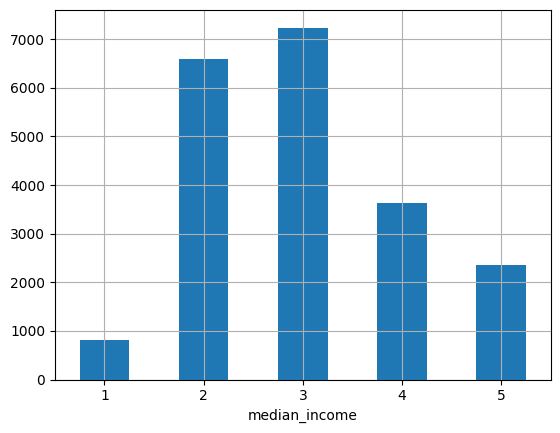

In [35]:
mxicut.value_counts().sort_index().plot.bar(rot=0, grid=True)

<Axes: xlabel='median_income'>

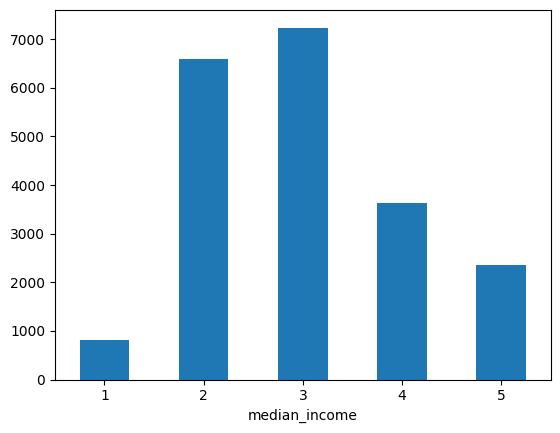

In [36]:
mxicut.value_counts().sort_index().plot.bar(rot=0, grid=False)

In [37]:
from sklearn.model_selection import StratifiedShuffleSplit

In [38]:
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

In [39]:
strat_splits = []

In [41]:
mysplit = splitter.split(housing, housing["income_cat"])

In [42]:
mysplit

<generator object BaseShuffleSplit.split at 0x14fc5fe40>

In [43]:
for i in mysplit: print(i)

(array([13096, 14973,  3785, ..., 19301, 19121, 19888]), array([ 3905, 16821,  2900, ..., 16634,  9779,  3455]))
(array([12898,  9367, 19304, ...,  9356,  7535,  3261]), array([11734,  3016, 19907, ...,  5264,  9811,   993]))
(array([ 1108, 13041, 14023, ..., 14230,  3997, 15875]), array([15389,  7193, 13314, ..., 10546, 11151, 10640]))
(array([20581,  1857,  9942, ...,  1532,  1406,  3859]), array([14190,  9837, 17881, ..., 14140, 16175,  1598]))
(array([ 9346, 12457, 16765, ...,  9305, 20087,  3928]), array([16578,  3358,  1369, ..., 14702,   495, 10955]))
(array([15191, 13992, 15445, ..., 18711, 19772,  1096]), array([ 2256, 17567,  9009, ..., 20309,  9003, 16106]))
(array([ 6408, 17079,  9105, ...,  9124, 17358,  3215]), array([ 1980, 10719,  7725, ..., 18893, 15186, 10560]))
(array([14758, 14246,  1868, ...,   763, 12526, 16847]), array([ 1678,  1268,  8056, ..., 11087, 20139,  1135]))
(array([ 8147, 16627,  6352, ..., 12324, 18267, 12790]), array([19338,  9719, 20036, ...,  2553,

In [46]:
mysplit = splitter.split(housing, housing["income_cat"])
for i,j in mysplit: print(i,j)

[13096 14973  3785 ... 19301 19121 19888] [ 3905 16821  2900 ... 16634  9779  3455]
[12898  9367 19304 ...  9356  7535  3261] [11734  3016 19907 ...  5264  9811   993]
[ 1108 13041 14023 ... 14230  3997 15875] [15389  7193 13314 ... 10546 11151 10640]
[20581  1857  9942 ...  1532  1406  3859] [14190  9837 17881 ... 14140 16175  1598]
[ 9346 12457 16765 ...  9305 20087  3928] [16578  3358  1369 ... 14702   495 10955]
[15191 13992 15445 ... 18711 19772  1096] [ 2256 17567  9009 ... 20309  9003 16106]
[ 6408 17079  9105 ...  9124 17358  3215] [ 1980 10719  7725 ... 18893 15186 10560]
[14758 14246  1868 ...   763 12526 16847] [ 1678  1268  8056 ... 11087 20139  1135]
[ 8147 16627  6352 ... 12324 18267 12790] [19338  9719 20036 ...  2553  8616 19450]
[19887  9051  2502 ...  4591  3656  9393] [ 3804 17282 12044 ...  3225 10033  4082]


In [61]:
mysplit = splitter.split(housing, housing["income_cat"])
for train_index, test_index in mysplit:
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])
strat_train_set, strat_test_set = strat_splits[0]

In [62]:
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

In [63]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [64]:
for myset in (strat_train_set, strat_test_set): myset.drop("income_cat", axis=1, inplace=True)

In [56]:
myset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
3905,-121.95,37.11,21.0,2387.0,357.0,913.0,341.0,7.7360,397700.0,<1H OCEAN
16821,-118.01,33.89,36.0,1589.0,265.0,804.0,272.0,4.6354,202900.0,<1H OCEAN
2900,-118.18,33.74,30.0,5915.0,1750.0,2136.0,1503.0,4.0968,310000.0,NEAR OCEAN
7193,-122.48,37.74,52.0,2166.0,423.0,1072.0,370.0,4.1310,314300.0,NEAR OCEAN
13928,-122.39,37.78,5.0,1405.0,515.0,725.0,392.0,3.6037,187500.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
12369,-124.16,40.79,46.0,3042.0,597.0,1206.0,541.0,2.1135,90600.0,NEAR OCEAN
8707,-119.01,35.39,29.0,1820.0,459.0,1134.0,419.0,1.8289,59400.0,INLAND
16634,-123.01,38.67,33.0,914.0,147.0,394.0,132.0,4.6875,246200.0,<1H OCEAN
9779,-122.03,37.60,24.0,2077.0,383.0,1488.0,389.0,4.5721,214700.0,NEAR BAY


In [57]:
help(myset.drop)


Help on method drop in module pandas.core.frame:

drop(labels: 'IndexLabel | None' = None, *, axis: 'Axis' = 0, index: 'IndexLabel | None' = None, columns: 'IndexLabel | None' = None, level: 'Level | None' = None, inplace: 'bool' = False, errors: 'IgnoreRaise' = 'raise') -> 'DataFrame | None' method of pandas.core.frame.DataFrame instance
    Drop specified labels from rows or columns.

    Remove rows or columns by specifying label names and corresponding
    axis, or by directly specifying index or column names. When using a
    multi-index, labels on different levels can be removed by specifying
    the level. See the :ref:`user guide <advanced.shown_levels>`
    for more information about the now unused levels.

    Parameters
    ----------
    labels : single label or list-like
        Index or column labels to drop. A tuple will be used as a single
        label and not treated as a list-like.
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Whether to drop labels fr

In [58]:
strat_train_set.copy()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,500001.0,<1H OCEAN
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,88800.0,INLAND
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,148800.0,NEAR OCEAN
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,500001.0,<1H OCEAN


<Axes: xlabel='longitude', ylabel='latitude'>

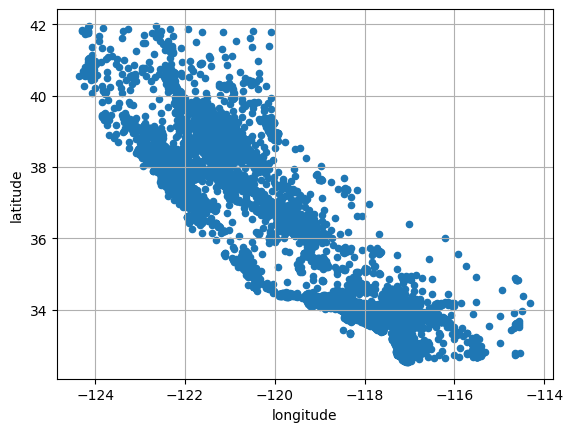

In [59]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)

latitude             -0.144160
longitude            -0.045967
population           -0.024650
total_bedrooms        0.049686
households            0.065843
housing_median_age    0.105623
total_rooms           0.134153
income_cat            0.643892
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64


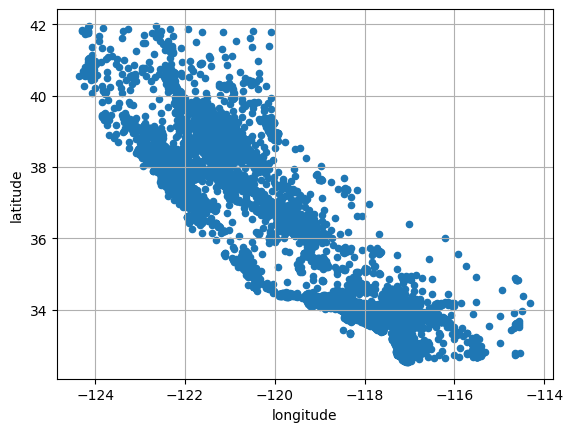

In [103]:
from sklearn.model_selection import StratifiedShuffleSplit

housing = pd.read_csv("housing.csv")
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0,1.5,3,4.5,6,np.inf], labels=[1,2,3,4,5])


splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
mysplit = splitter.split(housing, housing["income_cat"])

strat_splits = []
mysplit = splitter.split(housing, housing["income_cat"])
for train_index, test_index in mysplit:
    strat_train_set_n = housing.iloc[train_index].copy()
    strat_test_set_n = housing.iloc[test_index].copy()
    strat_splits.append([strat_train_set_n, strat_test_set_n])
strat_train_set, strat_test_set = strat_splits[0]


for myset in (strat_train_set, strat_test_set):
    myset.drop("income_cat", axis=1, inplace=True)
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
housing = housing.drop("ocean_proximity", axis=1)
corr_matrix = housing.corr()
print(corr_matrix["median_house_value"].sort_values(ascending=True))



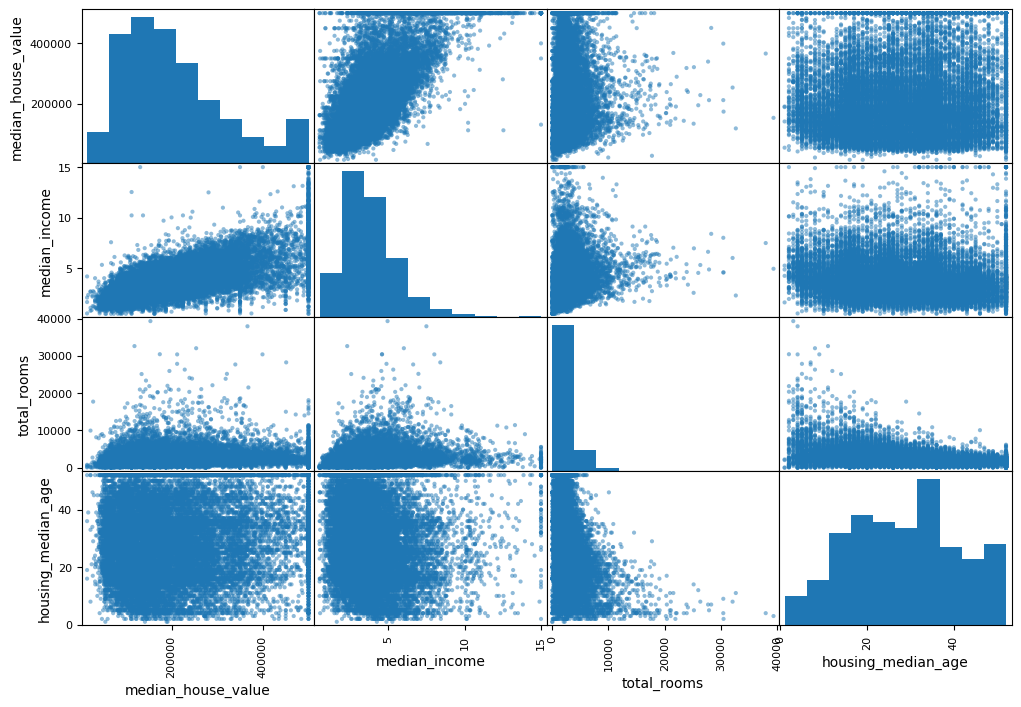

In [104]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))
plt.show()

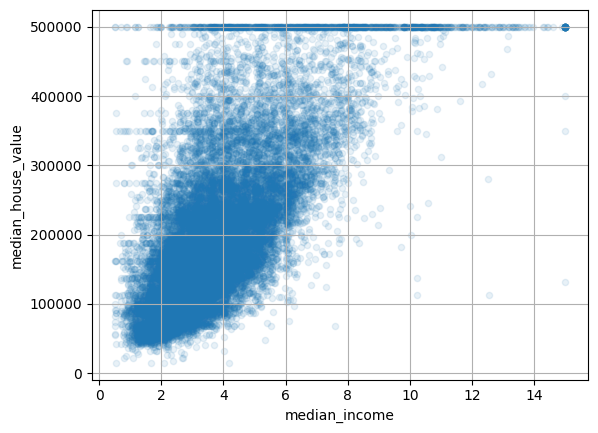

In [105]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1, grid=True)
plt.show()